<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_Supervised_Learning_Ess_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Supervised Learning Essential Training**

####**Linkedin Learning**

##**02_02**

In [1]:
# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

####**Prep data for modeling**

In [2]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 

In [3]:
# Read in the data from the data folder
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Datasets/LinkedinDS/SLET

Mounted at /content/drive/
/content/drive/My Drive/Datasets/LinkedinDS/SLET


In [4]:
student1 = pd.read_csv("student-mat.csv", sep = ';', header = 0)
student2 = pd.read_csv("student-por.csv", sep = ';', header = 0)

In [5]:
student1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
student2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
students = pd.concat([student1,student2])

In [8]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
# Print shape of dataset
print(students.shape)

(1044, 33)


In [10]:
# Check for missing data
total = students.isnull().sum().sort_values(ascending=False)
# Display total
print(total)


school        0
paid          0
G2            0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
famsup        0
sex           0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G3            0
dtype: int64


In [11]:
round(students.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.73,1.24,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.60,1.12,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.39,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.52,0.73,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.97,0.83,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.26,0.66,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.94,0.93,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.20,1.03,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.16,1.15,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.49,0.91,1.0,1.0,1.0,2.0,5.0


####**Describe dataset**

<ipython-input-12-54029c2113ef>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(students.corr(), cmap='Greens', annot=True, fmt='.2f')


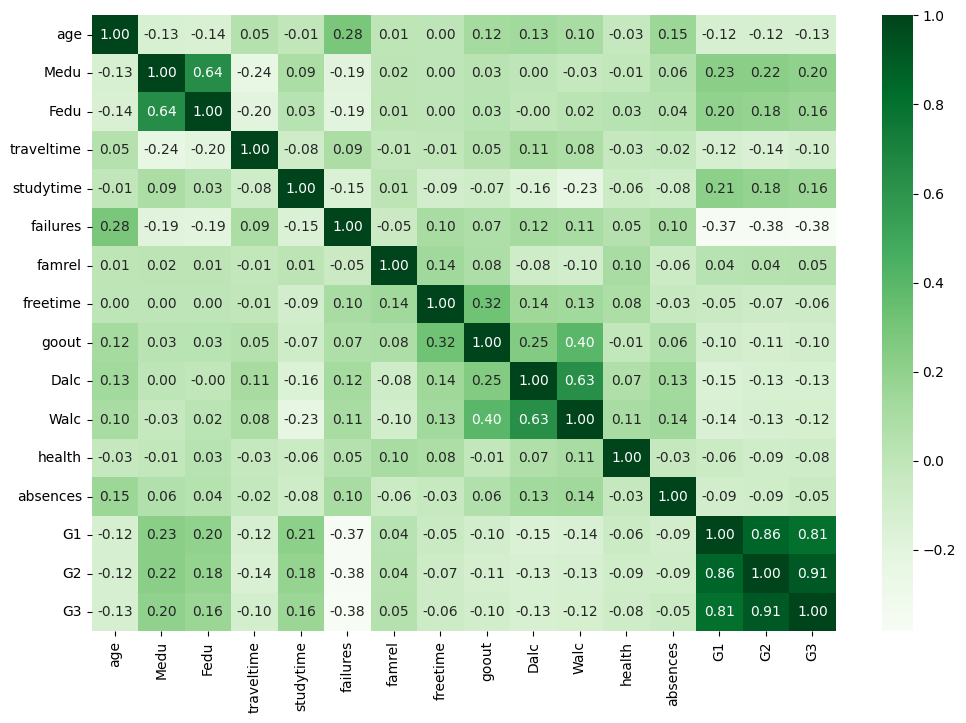

In [12]:
# Inspect feature correlations

plt.figure(figsize=(12,8))
ax = sns.heatmap(students.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show();

In [13]:
(students.shape)

(1044, 33)

In [14]:
students.corr()[['G3']].sort_values(by='G3', ascending = False)

<ipython-input-14-3880dbc251da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students.corr()[['G3']].sort_values(by='G3', ascending = False)


,G3
G3,1.000000
G2,0.910743
G1,0.809142
Medu,0.201472
studytime,0.161629
Fedu,0.159796
famrel,0.054461
absences,-0.045671
freetime,-0.064890
health,-0.080079


####**One hot encode labels**

In [15]:
encoded_students = OneHotEncoder().fit_transform(students).toarray()
print(encoded_students)

[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [16]:
(encoded_students.shape)

(1044, 192)

In [17]:
# Save encoded_students as pandas DataFrame
student_df = pd.DataFrame(encoded_students)
encoded_students.shape

(1044, 192)

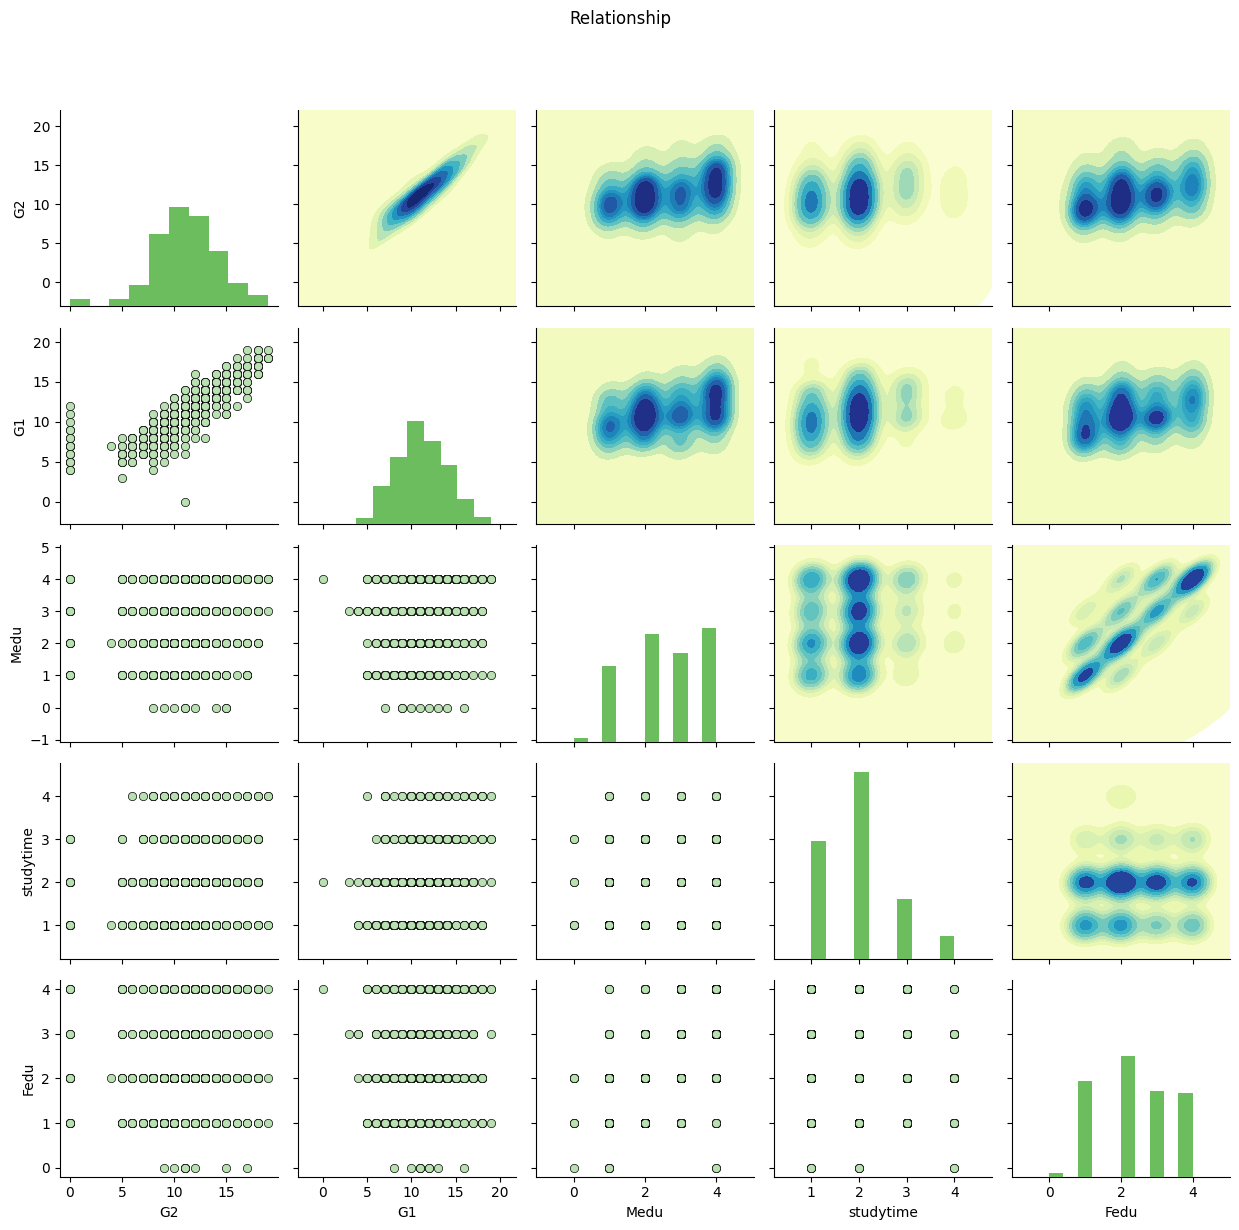

In [18]:
g = sns.PairGrid(students[['G2','G1','Medu','studytime', 'Fedu']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', fill=True, thresh=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9);

##**02_03**

In [ ]:
!pip install pysal

In [48]:
#import all libraries

# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

#sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

import scipy as sp
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sms
import pysal as ps

import statsmodels.tsa.api as smt
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [49]:
# Load student data
student1 = pd.read_csv("student-mat.csv", sep = ';', header = 0)
student2 = pd.read_csv("student-por.csv", sep = ';', header = 0)
students = pd.concat([student1,student2])

In [50]:
# View first few rows of data
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
# Drop protected columns
students = students.drop(['school', 'sex', 'address'], axis=1)

In [52]:
# Inspect Data

students.head()

,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,GT3,A,4,4,at_home,teacher,course,mother,2,...,4,3,4,1,1,3,6,5,6,6
1,17,GT3,T,1,1,at_home,other,course,father,1,...,5,3,3,1,1,3,4,5,5,6
2,15,LE3,T,1,1,at_home,other,other,mother,1,...,4,3,2,2,3,3,10,7,8,10
3,15,GT3,T,4,2,health,services,home,mother,1,...,3,2,2,1,1,5,2,15,14,15
4,16,GT3,T,3,3,other,other,home,father,1,...,4,3,2,1,2,5,4,6,10,10


In [55]:
# Create dummy variables for Family Size

df = pd.get_dummies(students, columns=['Pstatus','famsize','Mjob', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'schoolsup', 'nursery','higher','internet', 'romantic'])
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,schoolsup_no,schoolsup_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [56]:
# Look at highly correlated features

df.corr()[['G3']].sort_values(by='G3', ascending = False)

,G3
G3,1.000000
G2,0.910743
G1,0.809142
higher_yes,0.236578
Medu,0.201472
studytime,0.161629
Fedu,0.159796
reason_reputation,0.121303
internet_yes,0.107064
Fjob_teacher,0.101361


In [58]:
df.corr().loc[:, 'G3'].sort_values(ascending=False)


G3                   1.000000
G2                   0.910743
G1                   0.809142
higher_yes           0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic_no          0.098363
Mjob_teacher         0.084521
schoolsup_no         0.079346
famsize_LE3          0.061209
famrel               0.054461
paid_no              0.049388
Mjob_services        0.045015
guardian_father      0.042778
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
Pstatus_A            0.030693
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
famsup_no           -0.013313
Fjob_at_home        -0.021194
Fjob_other          -0.023825
Pstatus_T           -0.030693
activities_no       -0.033998
Fjob_services       -0.035273
nursery_no          -0.039950
reason_oth

In [59]:
df.corr().loc[:, 'G3'].sort_values(ascending=False)


G3                   1.000000
G2                   0.910743
G1                   0.809142
higher_yes           0.236578
Medu                 0.201472
studytime            0.161629
Fedu                 0.159796
reason_reputation    0.121303
internet_yes         0.107064
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic_no          0.098363
Mjob_teacher         0.084521
schoolsup_no         0.079346
famsize_LE3          0.061209
famrel               0.054461
paid_no              0.049388
Mjob_services        0.045015
guardian_father      0.042778
Fjob_health          0.042101
nursery_yes          0.039950
activities_yes       0.033998
Pstatus_A            0.030693
famsup_yes           0.013313
guardian_mother      0.009746
reason_home          0.003895
famsup_no           -0.013313
Fjob_at_home        -0.021194
Fjob_other          -0.023825
Pstatus_T           -0.030693
activities_no       -0.033998
Fjob_services       -0.035273
nursery_no          -0.039950
reason_oth

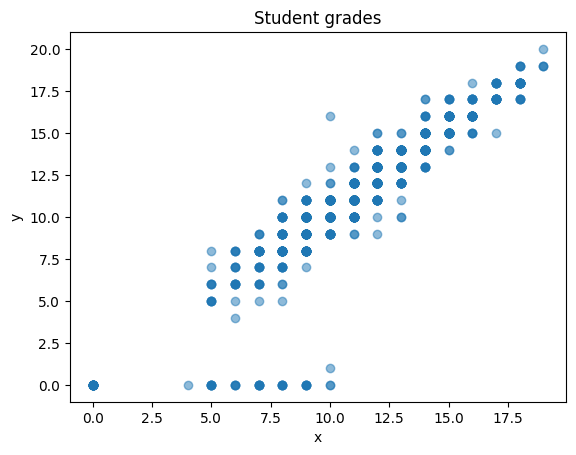

In [60]:
# Check Linearity - Section 2 Grades
X1 = df['G2']
y = df['G3']

# Plot
plt.scatter(X1,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

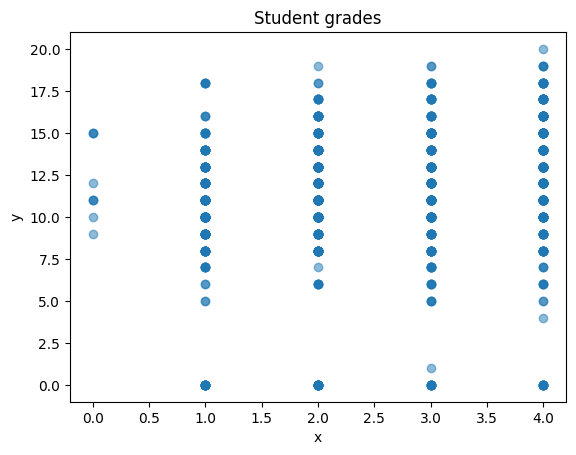

In [61]:
# Check Linearity - Mother's education
X2 = df['Medu']
y = df['G3']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

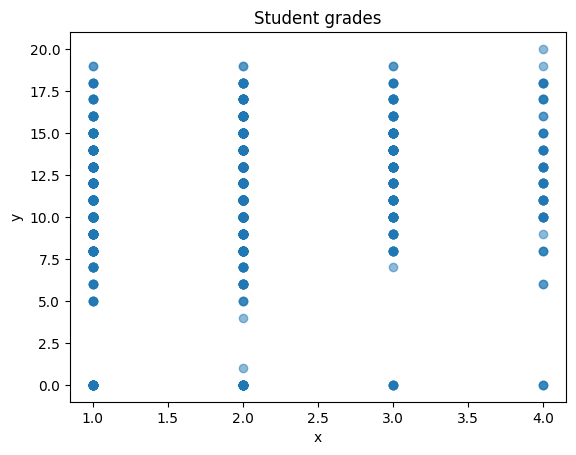

In [62]:
# Check Linearity - Study time
X2 = students['studytime']
y = students['G3']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Student grades')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [63]:
# Partition features and response
X = df.iloc[:, : -1]
y = df['G3']

In [64]:
# Split into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [65]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no'],
      dtype='object')

In [66]:
# Adding the constant term 
  
y = df.G3  # response
X = df.G2  # predictor
X = sms.add_constant(X)  # Adds a constant term to the predictor
X.head()  

,const,G2
0,1.0,6
1,1.0,5
2,1.0,8
3,1.0,14
4,1.0,10


In [67]:
# Create Regression Object

est=sms.OLS(y, X)

In [69]:
# Fit Regression Model
# Your Code Goes Here
est = est.fit()
# Summarize regression Model
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     5068.
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        22:16:03   Log-Likelihood:                -1969.0
No. Observations:                1044   AIC:                             3942.
Df Residuals:                    1042   BIC:                             3952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7079      0.176     -4.015      0.000      -1.054      -0.362
G2             1.0715      0.015     71.188      0.000       1.042       1.101
==============================================================================
Omnibus:                      714.254   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10032.938
Skew:                          -3.010   Prob(JB):                         0.00
Kurtosis:                      16.943   Cond. No.                         42.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# perform Durbin-Watson test

durbin_watson(est.resid)

1.8177022601944444

In [71]:
# Breusch-Pagan - Check for Multicolinearity
names = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Pstatus_A', 'Pstatus_T', 'famsize_GT3', 'famsize_LE3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'schoolsup_no', 'schoolsup_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
test = diag.het_breuschpagan(est.resid, est.model.exog)

lzip(names, test)

[('Medu', 34.90171352899837),
 ('Fedu', 3.4677554572131603e-09),
 ('traveltime', 36.039686108674545),
 ('studytime', 2.666334189856428e-09)]

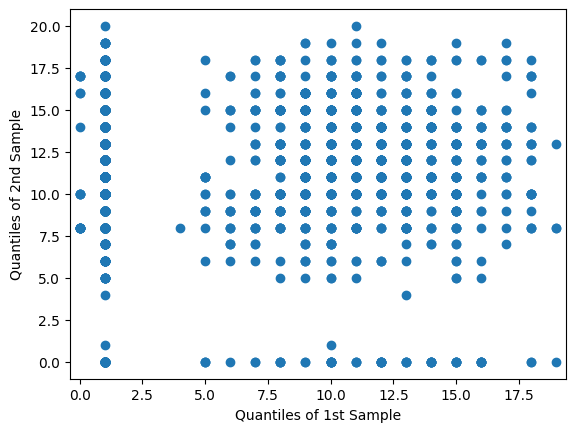

In [72]:
# Create QQ plot

from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sms.ProbPlot(X)
pp_y = sms.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
plt.show()

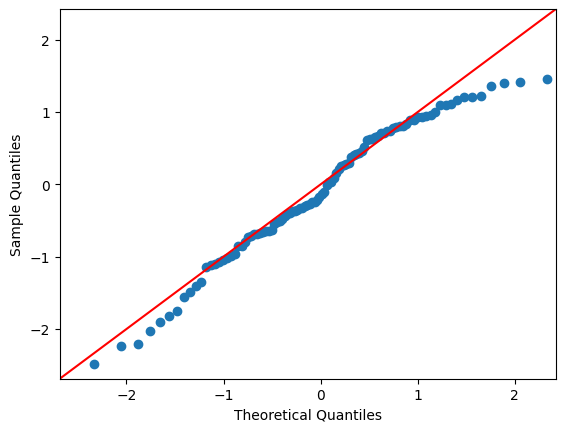

In [73]:
# Random data points generated 
data_points = np.random.normal(0, 1, 100)     
  
# Plot new QQ
sms.qqplot(data_points, line ='45') 
plt.show() 